In [42]:
import sys
import importlib
sys.path.append('../')
import model.op
importlib.reload(model.op)
from model.op import number_aircrafts_lp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ParseLP
importlib.reload(ParseLP)
from ParseLP import convert2df, calculate_num_aircrafts

In [43]:
tau_list = [[[0, 5.92], [5.85, 0]],
            [[0, 9.82], [10.59, 0]],
            [[0, 13.40], [13.59, 0]],
            [[0, 19.35], [19.39, 0]],
            [[0, 23.47], [23.67, 0]],
            [[0, 28.19], [28.20, 0]],
            [[0, 32.17], [32.39, 0]],
            [[0, 36.50], [36.75, 0]],
            [[0, 41.40], [41.37, 0]]]

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]

tau = tau_list[0]
print(tau)

kappa = kappa_list[0]
kappa = np.array(kappa)
kappa = kappa / 1.6
print(kappa)

[[0, 5.92], [5.85, 0]]
[[0.      7.71875]
 [7.44375 0.     ]]


In [74]:
kappa

array([[0.     , 7.71875],
       [7.44375, 0.     ]])

In [44]:


gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
         6.913363091, 9.685271742, 16.30528373, 71.41103553]
# gamma = [1.567183013,1.670689686,1.79349788,1.935972287,2.103057098,
#          2.30172949,2.541890384,2.83806663,3.212473781,3.70088931,
#          4.364896382,5.32037536,6.814736187,9.490547548,15.74119426,55.66984127]
number_aircrafts_lp(tau=tau, kappa=kappa, gamma=gamma, schedule='schedule', schedule_time_step=288, output_path='testingfunction')

Set parameter MIPGap to value 0.05
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-10910 CPU @ 3.60GHz
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 6490 rows, 31428 columns and 66878 nonzeros
Model fingerprint: 0x448ffb78
Variable types: 0 continuous, 31428 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 809 rows and 1411 columns
Presolve time: 0.07s
Presolved: 5681 rows, 30017 columns, 63553 nonzeros
Variable types: 0 continuous, 30017 integer (0 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   17994    5.0013001e+00   3.259443e+04   0.000000e+00      5s
   33422    1.4062654e+01   2.745916e+04   0.000000e+00     10s
   47485    1.5521498e+01   1.

In [55]:
# output_file = 'variable_values'
output_file = 'testingfunction'
specificn, specificu, specificc = convert2df(output_file)

In [56]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [65]:
# Load Charging Time Array
gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 6.913363091,
        9.685271742, 16.30528373, 71.41103553]

# gamma = [1.567183013,1.670689686,1.79349788,1.935972287,2.103057098,
#          2.30172949,2.541890384,2.83806663,3.212473781,3.70088931,
#          4.364896382,5.32037536,6.814736187,9.490547548,15.74119426,55.66984127]
gamma = np.array(gamma) / 5
gamma = np.ceil(gamma)

In [66]:
lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01, gamma=gamma, flight_time=np.array([[0,2],[2,0]]))
dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10, gamma=gamma, flight_time=np.array([[0,2],[2,0]]))
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn, gamma=gamma, flight_time=np.array([[0,2],[2,0]]))

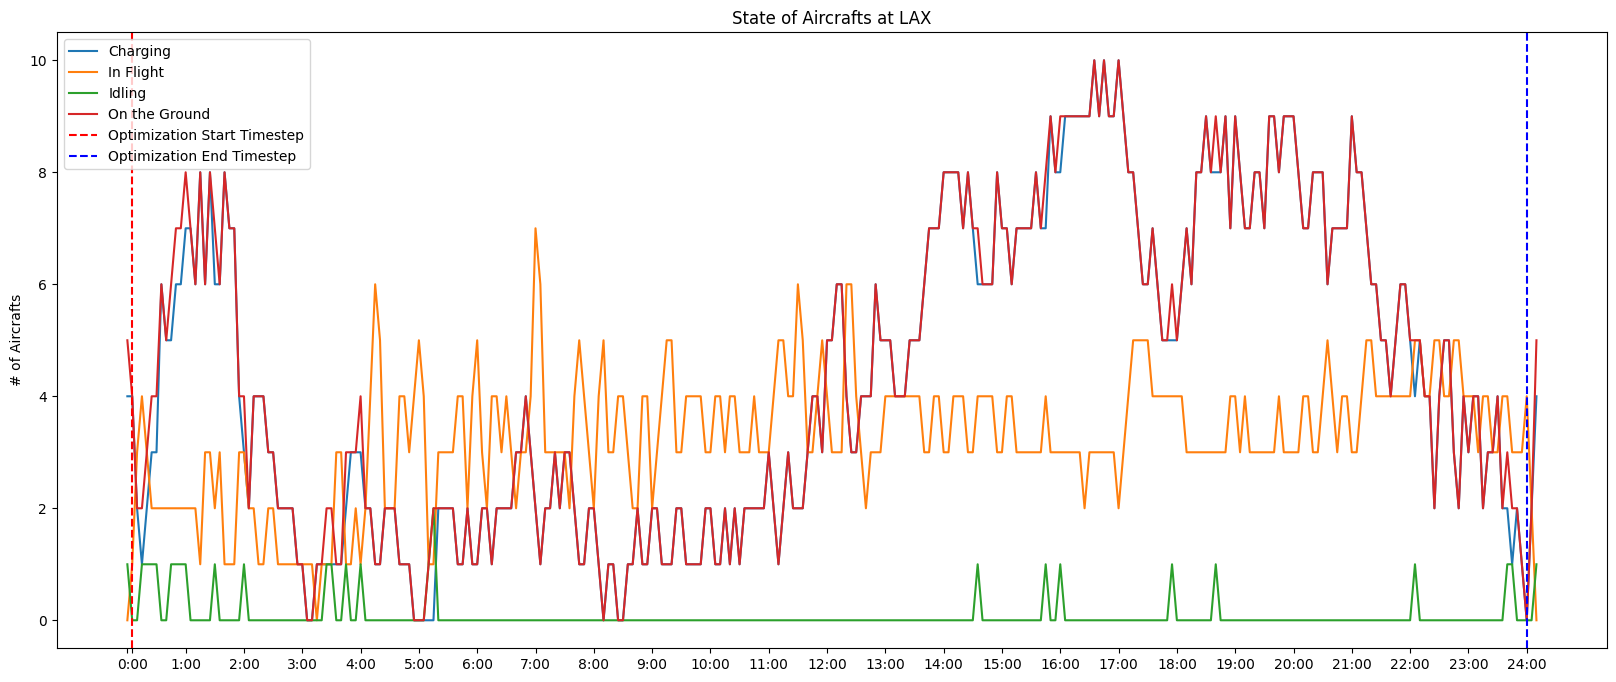

In [67]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(lax_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(lax_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(lax_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((lax_all_c.sum(axis=0)[x0:x1] + lax_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at LAX',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [68]:
print('At t = 0, c =', lax_all_c.sum(axis=0)[x0:x1][0], '; u=', lax_all_u.sum(axis=0)[x0:x1][0], '; n=', lax_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', lax_all_c.sum(axis=0)[x0:x1][286], '; u=', lax_all_u.sum(axis=0)[x0:x1][286], '; n=', lax_all_n.sum(axis=0)[x0:x1][286])

At t = 0, c = 4.0 ; u= 0.0 ; n= 1.0
At t = 290, c = 2.0 ; u= 3.0 ; n= 0.0


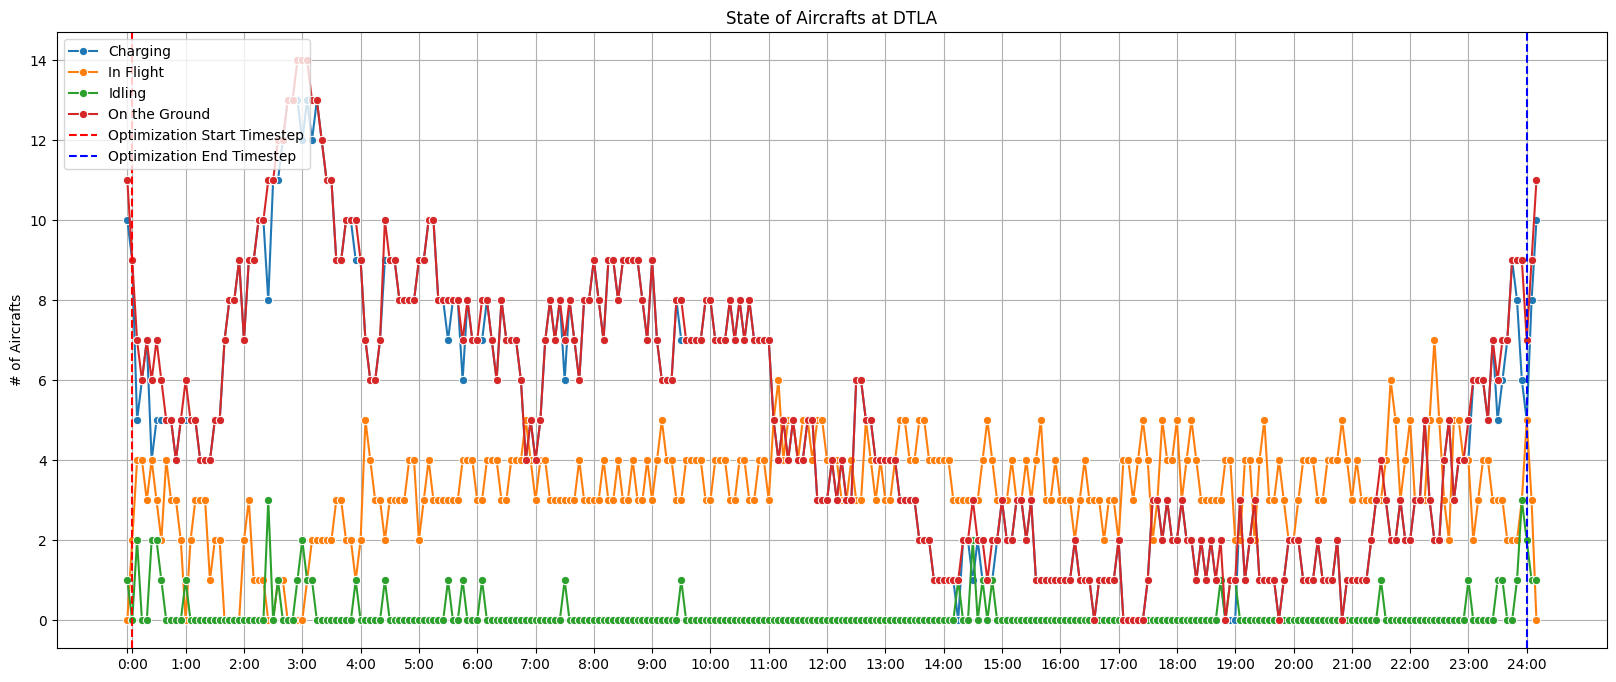

In [69]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(dtla_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax, marker='o')
sns.lineplot(dtla_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax, marker='o')
sns.lineplot(dtla_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax, marker='o')
sns.lineplot((dtla_all_c.sum(axis=0)[x0:x1] + dtla_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax, marker='o')
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at DTLA',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
plt.grid()

In [70]:
print('At t = 0, c =', dtla_all_c.sum(axis=0)[x0:x1][0], '; u=', dtla_all_u.sum(axis=0)[x0:x1][0], '; n=', dtla_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', dtla_all_c.sum(axis=0)[x0:x1][290], '; u=', dtla_all_u.sum(axis=0)[x0:x1][290], '; n=', dtla_all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 10.0 ; u= 0.0 ; n= 1.0
At t = 290, c = 10.0 ; u= 0.0 ; n= 1.0


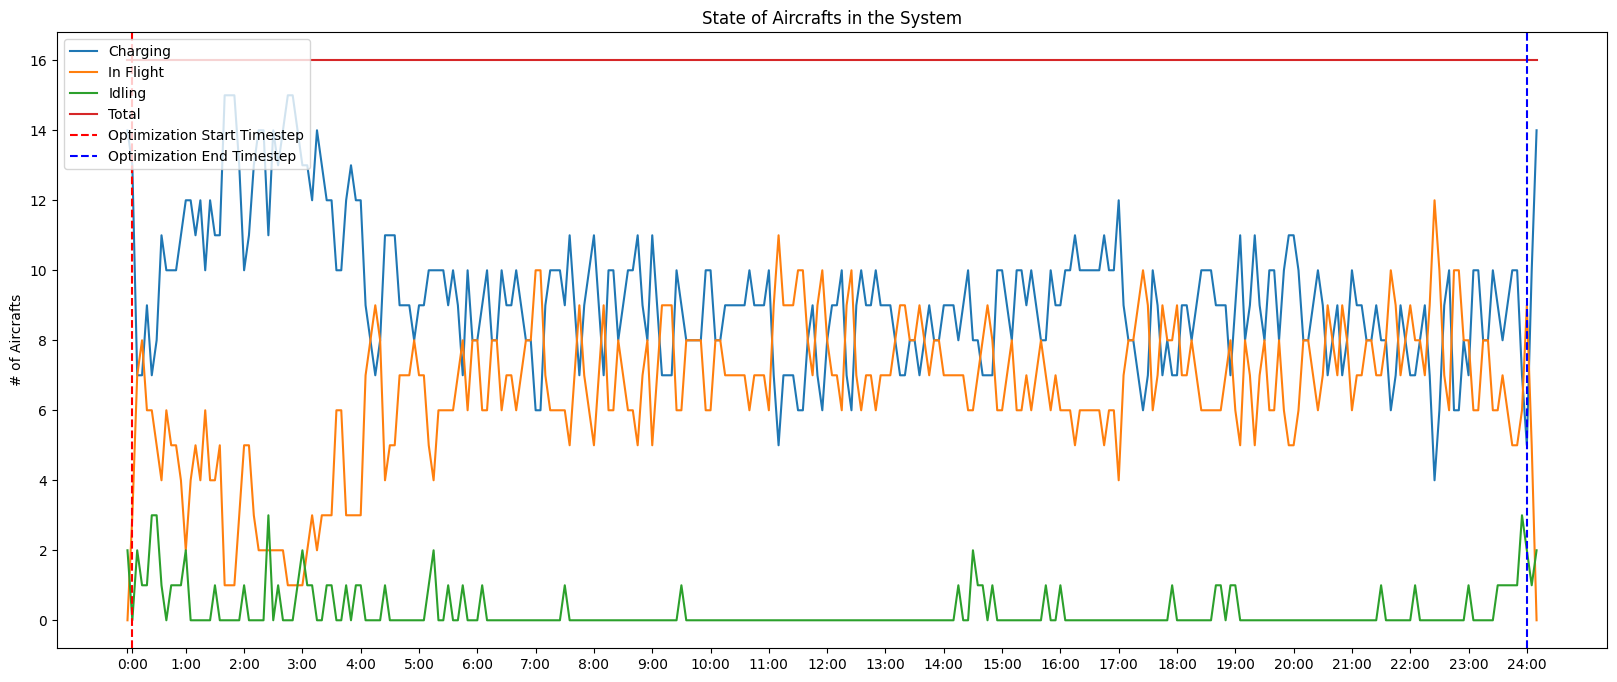

In [71]:
x0=0
x1=291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
# plt.xlim([0, 10])

In [72]:
print('At t = 0, c =', all_c.sum(axis=0)[x0:x1][0], '; u=', all_u.sum(axis=0)[x0:x1][0], '; n=', all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', all_c.sum(axis=0)[x0:x1][290], '; u=', all_u.sum(axis=0)[x0:x1][290], '; n=', all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 14.0 ; u= 0.0 ; n= 2.0
At t = 290, c = 14.0 ; u= 0.0 ; n= 2.0
